# Importar las librerias necesarias

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes

In [2]:
# Cargo en memoria el conjunto de datos a usar con la clase "load_diabetes"
data = load_diabetes().data
target = load_diabetes().target

# Instancio un objeto DataFrame que contenga el conjunto de datos en cuestion
variable_names = ["age", "sex", "bmi", "bp", "s1", "s2", "s3", "s4", "s5", "s6"]  # Nombres de las caracteristicas del dataset.
dataset_df = pd.DataFrame(data = data,
                          columns = variable_names)

# Incluyo la variable dependiente (target), en una nueva columna 'target'
dataset_df['target'] = target

# Muestro los primeros 10 ejemplos del conjunto de datos
dataset_df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


In [3]:
# La variable dependiente de este conjunto de datos es una variable continua, por lo que tratare de modelar
# la relacion entre dicha variable y el resto de caracteristicas mediante un algoritmo de regresion

In [4]:
# Muestro informacion del dataframe con df.info()
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [5]:
# La representacion anterior nos muestra como el conjunto de datos no cuenta con ningun valor nulo (este tipo de datasets
# estan creados y procesados para comenzar a trabajar con ellos).

# Ejecuto la siguiente linea para comprobar la ausencia de valores nulos
dataset_df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [6]:
# Muestro un cuadro a modo de resumen del conjunto de datos
dataset_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [7]:
# Esta funcion incorporada de Pandas es muy util para ayudar a ver de un simple vistazo informacion valiosa sobre nuestro
# dataset.

# En concreto, la funcion muestra informacion acerca de todas las variables continuas que forman parte del dataset.
# Dentro de la informacion que obtenemos, podemos encontrar la media y desviacion tipica para cada columna, asi como el minimo y maximo
# de cada una.

<Axes: >

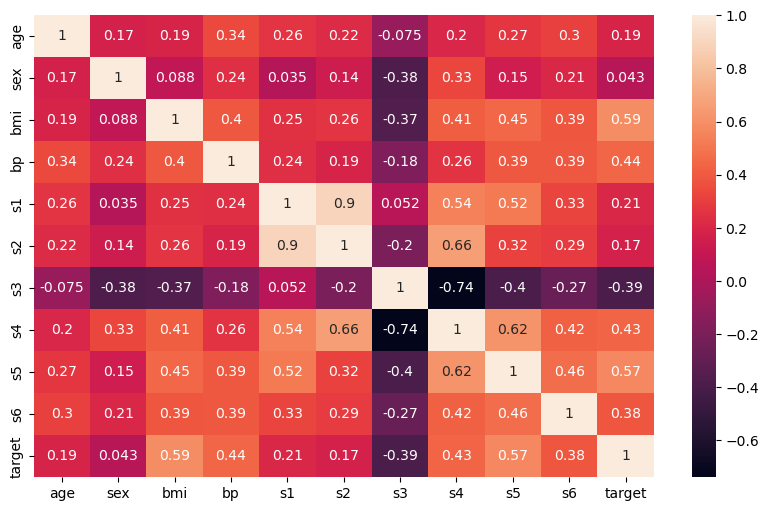

In [8]:
# Represento un mapa de calor con los coeficientes de correlacion de todas las variables del conjunto de datos
corr_matrix = dataset_df.corr()

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True)

In [9]:
# Como vemos, la gran mayoria de las variables del dataset tienen capacidad suficiente para actuar como covariables predictoras de la variable dependiente, siempre y cuando usemos algoritmos lineales.
# En este caso, la variable cuyo coeficiente de correlacion es mas cercano a 0 es 'sex', por lo que podemos esperar que dicha variable aporta mas bien poca informacion a nuestro modelo, al no existir
# apenas relacion entre dicha variable y la variable objetivo.

# Por otro lado, s1 y s2 tienen ambos una gran correlacion, por lo que omitire una de estas variables al construir mi variable de caracteristicas (incluir variables que tengan una relacion lineal muy elevada entre si
# puede aumentar la multicolinealidad de nuestro modelo, lo que puede resultar negativo).

# Modelando dataset con todas las variables como predictoras [NO PENALTY]

In [10]:
# Defino mi matriz de caracteristicas y la matriz de la variable objetivo

X = dataset_df.drop(columns = ['target'])   # Comienzo excluyendo solo la variable dependiente
y = dataset_df['target']

In [11]:
# Divido el conjunto de datos en subsets de entrenamiento y prueba
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # <== Aplico un factor de randomizacion al generar los subsets de entrenamiento y prueba

In [12]:
X_train.shape

(353, 10)

In [13]:
X_test.shape

(89, 10)

In [14]:
y_train.shape

(353,)

In [15]:
y_test.shape

(89,)

In [16]:
# En este momento, podria aplicar normalizacion a mi conjunto de datos, haciendo uso de la clase StandardScaler en mis matrices de caracteristicas.
# No obstante, me voy a ahorrar este paso, puesto que se se puede apreciar una normalizacion previa en los datos registrados en el dataset.

In [17]:
# Defino un primer modelo lineal
from sklearn.linear_model import LinearRegression

model = LinearRegression()


# Antes de entrenar el modelo, aplico validacion cruzada pasandole el conjunto de datos completo a la clase cross_val_score
scores = cross_val_score(model, X, y, cv = 5)  # Defino 5 folds de validacion
print("Puntuacion para cada fold de la validacion ==>", scores)
print("Puntuacion media de la validacion ==>", scores.mean())

Puntuacion para cada fold de la validacion ==> [0.42955615 0.52259939 0.48268054 0.42649776 0.55024834]
Puntuacion media de la validacion ==> 0.4823164359086423


In [18]:
std_dev = scores.std()
print(f"Desviación estándar de los folds: {std_dev:.4f}")

Desviación estándar de los folds: 0.0493


In [19]:
# Existe muy poca variacion entre los resultados obtenidos con cada uno de los folds generados para validacion

In [20]:
# Entreno el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Obtengo el coeficiente R2 del modelo entrenado, en relacion con el conjunto de prueba
model.score(X_test, y_test)

0.45260276297191937

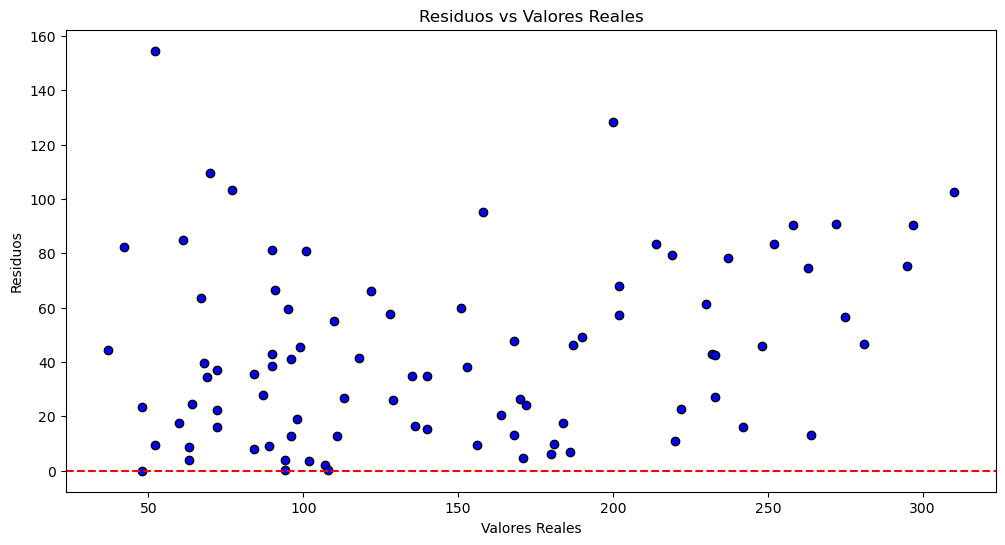

In [22]:
# Genero predicciones para el modelo entrenado
y_pred = model.predict(X_test)


# Obtengo los residuos de las predicciones
residuos = abs(y_pred - y_test)

plt.figure(figsize = (12,6))
# Represento dichas predicciones en un grafico vs los valores reales
plt.scatter(y_test, residuos, color='blue', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')

plt.title('Residuos vs Valores Reales') 
plt.xlabel('Valores Reales')  # Etiqueta del eje X
plt.ylabel('Residuos')  # Etiqueta del eje Y

plt.show()

In [23]:
# Podemos ver como la predicion del modelo es bastante baja, generando en la mayoria de los ejemplos del conjunto de prueba, valores de y muy dispares a los valores reales.

# Modelando dataset escogiendo las variables predictoras [NO PENALTY]

In [24]:
# Defino las matrices de caracteristicas y de la variable dependiente, omitiendo aquellas variables que no aporten valor al modelo final
X = dataset_df.drop(columns = ['sex', 's1', 'target'])
y = dataset_df['target']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # <== Aplico un factor de randomizacion al generar los subsets de entrenamiento y prueba

In [26]:
X_train.shape

(353, 8)

In [27]:
X_test.shape

(89, 8)

In [28]:
y_train.shape

(353,)

In [29]:
y_test.shape

(89,)

In [30]:
# Defino un segundo modelo lineal
model = LinearRegression()


# Antes de entrenar el modelo, aplico validacion cruzada pasandole el conjunto de datos completo a la clase cross_val_score
scores = cross_val_score(model, X, y, cv = 5)  # Defino 5 folds de validacion
print("Puntuacion para cada fold de la validacion ==>", scores)
print("Puntuacion media de la validacion ==>", scores.mean())

Puntuacion para cada fold de la validacion ==> [0.38018113 0.49606272 0.50434107 0.38716398 0.53262883]
Puntuacion media de la validacion ==> 0.4600755467015484


In [31]:
# Entreno el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# Obtengo el coeficiente R2 del modelo entrenado, en relacion con el conjunto de prueba
model.score(X_test, y_test)

0.44274385598617805

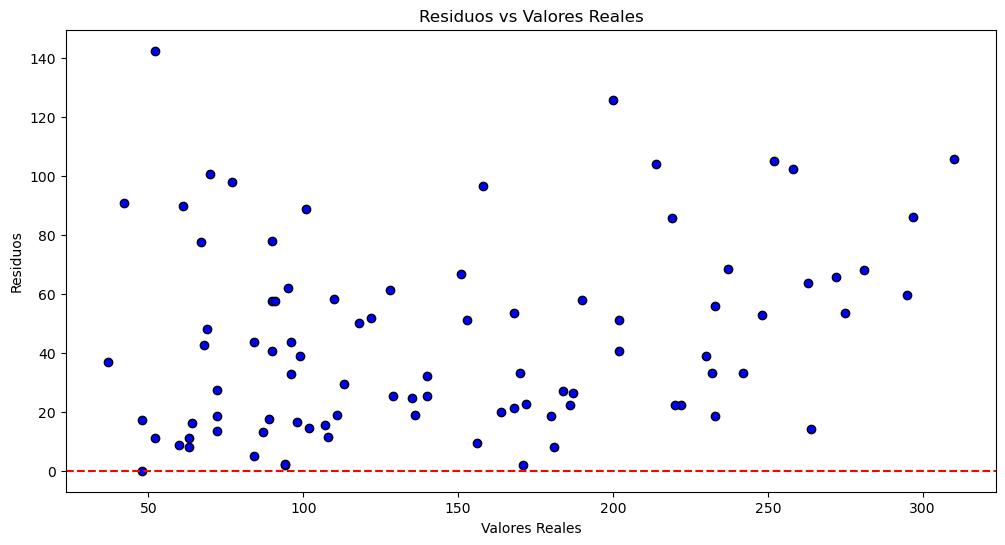

In [33]:
# Genero predicciones para el modelo entrenado
y_pred = model.predict(X_test)


# Obtengo los residuos de las predicciones
residuos = abs(y_pred - y_test)

plt.figure(figsize = (12,6))
# Represento dichas predicciones en un grafico vs los valores reales
plt.scatter(y_test, residuos, color='blue', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')

plt.title('Residuos vs Valores Reales') 
plt.xlabel('Valores Reales')  # Etiqueta del eje X
plt.ylabel('Residuos')  # Etiqueta del eje Y

plt.show()

In [34]:
# El resultado de haber entrenado un modelo escogiendo manualmente el conjunto de variables predictoras ha sido obtener un modelo con un rendimiento aun mas bajo, por lo que tengo que cambiar el planteamiento que
# estoy utilizando.

In [35]:
# Modelando dataset mediante Aprendizaje Profundo
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=5000, epsilon=1e-04)
model.fit(X_train, y_train)

MLPRegressor(epsilon=0.0001, hidden_layer_sizes=(100, 100), max_iter=5000)

In [36]:
model.score(X_test, y_test)

0.49388594104669525

In [37]:
# El modelo sigue sin poder modelar una relacion optima entre las variables predictoras y la variable dependiente. Sin embargo, el coeficiente de 0.5 que he obtenido corresponde al valor mas alto
# que he podido obtener (tras entrenar el modelo con algoritmos de regresion lineal sin y con regularizacion, y probar varias configuracion de densidad de capas, epocas de entrenamiento y valor de epsilon)
# de entre todos los modelos con lo que he probado.

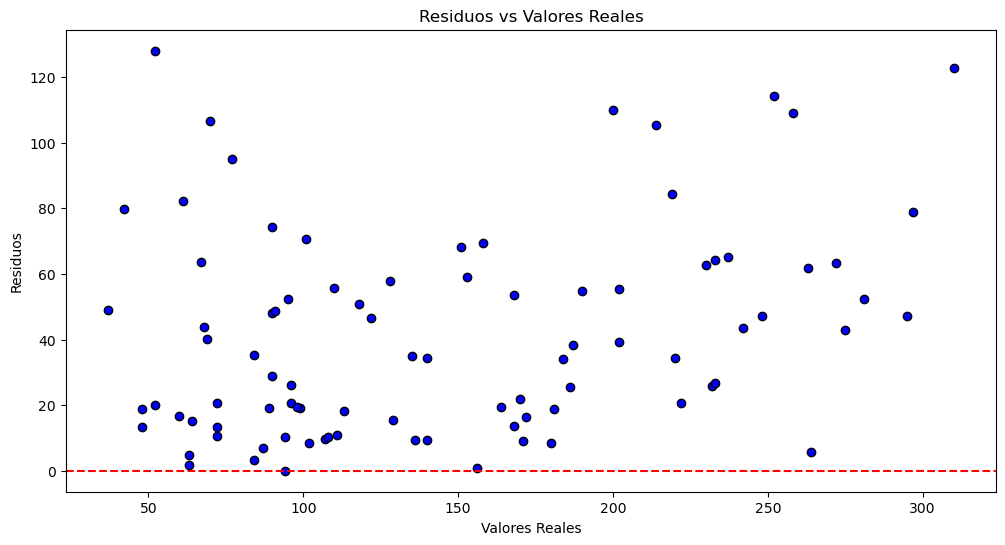

In [38]:
# Genero predicciones para el modelo entrenado
y_pred = model.predict(X_test)


# Obtengo los residuos de las predicciones
residuos = abs(y_pred - y_test)

plt.figure(figsize = (12,6))
# Represento dichas predicciones en un grafico vs los valores reales
plt.scatter(y_test, residuos, color='blue', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')

plt.title('Residuos vs Valores Reales') 
plt.xlabel('Valores Reales')  # Etiqueta del eje X
plt.ylabel('Residuos')  # Etiqueta del eje Y

plt.show()

# Aplicando una logica diferente

## Modelo de clasificacion SVM

Vemos que diferentes modelos de regresion no son capaces de modelar la relacion entre las caracteristicas y la variable objetivo. 

Tras esto, pruebo a cambiar el enfoque, y definir la variable objetivo como una variable continua discretizada, de modo que podamos probar a entrenar un modelo que sea capaz de clasificar cada ejemplo del dataset
dentro de alguna clase

In [39]:
# Muestro de nuevo el cuadro de resumen
dataset_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [40]:
# El los valores de la variable objetivo se encuentran dentro del siguiente rango ==> [25, 346]
# Defino algunas clases para las que podamos clasificar los ejemplos del dataset

# Si 25 <= target > 80 : Clase 1
# Si 80 <= target > 160 : Clase 2
# Si 160 <= target > 250 : Clase 3
# Si 250 <= target > 330 : Clase 4
# Si 330 <= target : Clase 5

In [41]:
# Defino el diccionario que me permitira mapear los valores de la columna 'target'
classes_dict = {
    1: list(range(1, 80)),
    2: list(range(81, 160)),
    3: list(range(161, 250)),
    4: list(range(251, 330))
}

In [42]:
target_values = dataset_df['target']
len(target_values.values)

442

In [43]:
# Defino una nueva lista que contenga las clases a la que pertenece cada uno de los valores registrados en la variable dependiente
target_classes = []

for target_value in target_values:
    added = False
    if target_value >= 330:
        target_classes.append(5)
        added = True 
    if not added:  
        
        for key, value in classes_dict.items():
            if int(target_value) in value:
                target_classes.append(key)
                added = True  
                break
    if not added:  
        # Incluyo una etiqueta -1, pues me generaba error al generar el nuevo array
        target_classes.append(-1)

In [44]:
y = np.array(target_classes)  # Array con cada valor clasificado

In [45]:
len(y)

442

In [46]:
y

array([ 2,  1,  2,  3,  2,  2,  2,  1,  2,  4,  2,  1,  3,  3,  2,  3,  3,
        2,  2,  3,  1,  1,  1,  3,  3,  3,  2,  2,  2,  4,  2,  1,  5,  2,
        1,  2,  4,  4,  4,  2,  2,  1,  1,  2,  4,  1,  3,  2,  1,  2,  2,
        3,  1,  2,  3,  2,  1,  1,  3,  3,  1,  2,  1,  2,  1,  3,  2,  2,
       -1,  3,  1,  4,  3,  2,  2,  1,  3,  3,  4,  2,  2,  1,  1,  3,  1,
        2,  1,  2,  1,  2,  2,  3,  1,  2,  2,  3,  2,  4,  2,  2,  2,  2,
        4,  3,  2,  1,  2,  2,  3,  2,  2,  1,  3,  4,  4,  3,  4,  4,  3,
        3,  3,  3,  3,  2,  2,  3,  2,  2,  2,  4,  4,  2,  2,  2,  2,  4,
        2,  4,  5,  4,  2,  4,  3,  1,  3,  4,  3,  2,  2,  2,  4,  2,  4,
        1,  3,  3,  1,  2,  2,  3,  1,  3,  3,  2,  3,  1,  1,  3,  4,  2,
        1,  1,  4,  2,  2,  2,  3,  3,  2,  2,  2,  1,  2,  3,  4,  2,  2,
        2,  2,  1,  4,  3,  2,  2,  2,  2,  1,  2,  2,  2,  2,  1,  3,  3,
        4,  2,  3,  3,  2,  1,  3,  1,  1,  1,  1,  4,  3,  4,  3,  3,  1,
        2,  4,  2,  1,  3

In [47]:
# Defino una matriz de caracteristicas (incluyo todas las variables del dataset)
X = dataset_df.drop(columns = ['target'])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # <== Aplico un factor de randomizacion al generar los subsets de entrenamiento y prueba

In [62]:
# Instancio un modelo basado en SVM
from sklearn.svm import SVC

model = SVC(kernel = 'sigmoid')
model.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [63]:
# Muestro el coeficiente R2 del modelo entrenado en relacion al conjunto de prueba
model.score(X_test, y_test)

0.4943820224719101

In [64]:
# Genero predicciones para el conjunto de prueba
y_pred = model.predict(X_test)

In [128]:
# Evaluo el rendimiento del modelo con una matriz de confusion y un cuadro de clasificacion
from sklearn.metrics import classification_report, confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print(class_report)

[[ 6 11  2  0]
 [ 8 20  6  0]
 [ 1 11 13  1]
 [ 0  3  2  5]]
              precision    recall  f1-score   support

           1       0.40      0.32      0.35        19
           2       0.44      0.59      0.51        34
           3       0.57      0.50      0.53        26
           4       0.83      0.50      0.62        10

    accuracy                           0.49        89
   macro avg       0.56      0.48      0.50        89
weighted avg       0.51      0.49      0.49        89



Los resultados obtenidos para este dataset no son especialmente buenos. Ademas de los modelos y procesamientos que se muestran en el notebook, he probado con otras diferentes combinaciones, obtenido un coeficiente R2
maximo de 0.52.